In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
import pandas as pd
from itertools import combinations

df = pd.read_csv('lung cancer survey.csv')
df_no_na = df.dropna()

#21 year old observation is anomalous. Thus, dropped.
df_no_na = df_no_na[df_no_na["AGE"] > 21]

df_no_na['cluster'] = df_no_na['AGE'].apply(lambda x: 1 if x >= 61 else 0)
df_no_na
# df_no_na = df_no_na.drop("AGE", axis = 1)
df_no_na.corr()

# Get all 5C2 combinations of the columns
column_combinations = list(combinations(df_no_na.columns, 2))

# Modify the logic to multiply the values of the two columns in each combination
for col1, col2 in column_combinations:
    new_col_name = f"{col1}_{col2}"
    df_no_na[new_col_name] = df_no_na[col1] * df_no_na[col2]

df_no_na
df_no_na.to_csv('all_combi.csv',index=False)


GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0.0  61.0      0.0             0.0      1.0            1.0   
1        1.0  70.0      1.0             1.0      0.0            0.0   
2        1.0  59.0      0.0             0.0      0.0            0.0   
3        1.0  54.0      0.0             0.0      0.0            1.0   
4        0.0  54.0      1.0             0.0      0.0            1.0   
...      ...   ...      ...             ...      ...            ...   
8996     1.0  62.0      0.0             1.0      1.0            1.0   
8997     0.0  71.0      1.0             1.0      1.0            0.0   
8998     1.0  63.0      1.0             0.0      0.0            1.0   
8999     1.0  70.0      1.0             1.0      0.0            0.0   
9099     1.0  62.0      0.0             0.0      0.0            1.0   

      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                 0.0       1.0       0.0       0.0                0.0   
1                 1.0       0.0       1.0       1.0                0.0   
2                 1.0       1.0       0.0       0.0                0.0   
3                 0.0       1.0       0.0       1.0                1.0   
4                 0.0       1.0       1.0       0.0                1.0   
...               ...       ...       ...       ...                ...   
8996              0.0       1.0       0.0       0.0                0.0   
8997              0.0       0.0       1.0       0.0                1.0   
8998              0.0       0.0       0.0       0.0                0.0   
8999              1.0       1.0       1.0       0.0                1.0   
9099              0.0       1.0       1.0       1.0                1.0   

      COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0          0.0                  1.0                    0.0         0.0   
1          1.0                  1.0                    0.0         0.0   
2          0.0                  0.0                    0.0         1.0   
3          1.0                  1.0                    0.0         1.0   
4          0.0                  0.0                    1.0         0.0   
...        ...                  ...                    ...         ...   
8996       0.0                  0.0                    1.0         1.0   
8997       1.0                  1.0                    0.0         1.0   
8998       1.0                  1.0                    0.0         0.0   
8999       0.0                  1.0                    0.0         1.0   
9099       0.0                  0.0                    1.0         0.0   

      LUNG_CANCER  cluster  
0             1.0        1  
1             1.0        1  
2             0.0        0  
3             1.0        0  
4             1.0        0  
...           ...      ...  
8996          1.0        1  
8997          1.0        1  
8998          0.0        1  
8999          1.0        1  
9099          1.0        1  

[9000 rows x 17 columns]

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.005543 -0.011091       -0.031982 -0.039688   
AGE                   -0.005543  1.000000  0.008597        0.004523  0.032944   
SMOKING               -0.011091  0.008597  1.000000        0.001875  0.013509   
YELLOW_FINGERS        -0.031982  0.004523  0.001875        1.000000  0.062337   
ANXIETY               -0.039688  0.032944  0.013509        0.062337  1.000000   
PEER_PRESSURE         -0.074431  0.007555 -0.026481        0.055349  0.040471   
CHRONIC DISEASE       -0.004365 -0.008329 -0.029657        0.008992 -0.032866   
FATIGUE               -0.049215  0.053613  0.001695       -0.001341 -0.017928   
ALLERGY                0.053157 -0.019463  0.024306       -0.028243 -0.047311   
WHEEZING               0.036826  0.001679 -0.032343       -0.043450 -0.039382   
ALCOHOL CONSUMING      0.040493 -0.004965 -0.019939       -0.075707 -0.001826   
COUGHING               0.027357  0.003587 -0.007131        0.014883 -0.058642   
SHORTNESS OF BREATH    0.017837  0.018522 -0.003838        0.016048 -0.005192   
SWALLOWING DIFFICULTY -0.009260 -0.006974 -0.004096        0.065091  0.078098   
CHEST PAIN             0.043874  0.020547  0.010044       -0.018293 -0.053414   
LUNG_CANCER           -0.141006  0.052523  0.063074        0.217762  0.035395   
cluster               -0.006049  0.878864  0.004961       -0.004068  0.043911   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.074431        -0.004365 -0.049215  0.053157   
AGE                         0.007555        -0.008329  0.053613 -0.019463   
SMOKING                    -0.026481        -0.029657  0.001695  0.024306   
YELLOW_FINGERS              0.055349         0.008992 -0.001341 -0.028243   
ANXIETY                     0.040471        -0.032866 -0.017928 -0.047311   
PEER_PRESSURE               1.000000         0.009267 -0.004084 -0.055663   
CHRONIC DISEASE             0.009267         1.000000 -0.010099  0.024349   
FATIGUE                    -0.004084        -0.010099  1.000000 -0.025989   
ALLERGY                    -0.055663         0.024349 -0.025989  1.000000   
WHEEZING                   -0.054281        -0.010450 -0.027989  0.049639   
ALCOHOL CONSUMING          -0.057384        -0.028640 -0.019973  0.065076   
COUGHING                   -0.051376        -0.074833 -0.001747  0.025346   
SHORTNESS OF BREATH        -0.047932        -0.007917  0.046516 -0.007747   
SWALLOWING DIFFICULTY       0.106201         0.050285 -0.022535 -0.027669   
CHEST PAIN                 -0.021050        -0.023264 -0.015378  0.013393   
LUNG_CANCER                 0.057908        -0.021226  0.085235  0.106577   
cluster                     0.002137        -0.016780  0.058268 -0.006879   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.036826           0.040493  0.027357   
AGE                    0.001679          -0.004965  0.003587   
SMOKING               -0.032343          -0.019939 -0.007131   
YELLOW_FINGERS        -0.043450          -0.075707  0.014883   
ANXIETY               -0.039382          -0.001826 -0.058642   
PEER_PRESSURE         -0.054281          -0.057384 -0.051376   
CHRONIC DISEASE       -0.010450          -0.028640 -0.074833   
FATIGUE               -0.027989          -0.019973 -0.001747   
ALLERGY                0.049639           0.065076  0.025346   
WHEEZING               1.000000           0.126259  0.049138   
ALCOHOL CONSUMING      0.126259           1.000000  0.070990   
COUGHING               0.049138           0.070990  1.000000   
SHORTNESS OF BREATH    0.010180          -0.011847  0.034095   
SWALLOWING DIFFICULTY  0.027963          -0.031295 -0.083149   
CHEST PAIN             0.009885           0.024843  0.021032   
LUNG_CANCER           -0.080372           0.207659 -0.000414   
cluster                0.008480          -0.011718 -0.007702   

                       SHO

/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_97828/3147943353.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_no_na[new_col_name] = df_no_na[col1] * df_no_na[col2]
/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_97828/3147943353.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_no_na[new_col_name] = df_no_na[col1] * df_no_na[col2]
/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_97828/3147943353.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result

GENDER   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        0.0  61.0      0.0             0.0      1.0            1.0   
1        1.0  70.0      1.0             1.0      0.0            0.0   
2        1.0  59.0      0.0             0.0      0.0            0.0   
3        1.0  54.0      0.0             0.0      0.0            1.0   
4        0.0  54.0      1.0             0.0      0.0            1.0   
...      ...   ...      ...             ...      ...            ...   
8996     1.0  62.0      0.0             1.0      1.0            1.0   
8997     0.0  71.0      1.0             1.0      1.0            0.0   
8998     1.0  63.0      1.0             0.0      0.0            1.0   
8999     1.0  70.0      1.0             1.0      0.0            0.0   
9099     1.0  62.0      0.0             0.0      0.0            1.0   

      CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ...  \
0                 0.0       1.0       0.0       0.0  ...   
1                 1.0       0.0       1.0       1.0  ...   
2                 1.0       1.0       0.0       0.0  ...   
3                 0.0       1.0       0.0       1.0  ...   
4                 0.0       1.0       1.0       0.0  ...   
...               ...       ...       ...       ...  ...   
8996              0.0       1.0       0.0       0.0  ...   
8997              0.0       0.0       1.0       0.0  ...   
8998              0.0       0.0       0.0       0.0  ...   
8999              1.0       1.0       1.0       0.0  ...   
9099              0.0       1.0       1.0       1.0  ...   

      SHORTNESS OF BREATH_SWALLOWING DIFFICULTY  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
...                                         ...   
8996                                        0.0   
8997                                        0.0   
8998                                        0.0   
8999                                        0.0   
9099                                        0.0   

      SHORTNESS OF BREATH_CHEST PAIN  SHORTNESS OF BREATH_LUNG_CANCER  \
0                                0.0                              1.0   
1                                0.0                              1.0   
2                                0.0                              0.0   
3                                1.0                              1.0   
4                                0.0                              0.0   
...                              ...                              ...   
8996                             0.0                              0.0   
8997                             1.0                              1.0   
8998                             0.0                              0.0   
8999                             1.0                              1.0   
9099                             0.0                              0.0   

      SHORTNESS OF BREATH_cluster  SWALLOWING DIFFICULTY_CHEST PAIN  \
0                             1.0                               0.0   
1                             1.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
4                             0.0                               0.0   
...                           ...                               ...   
8996                          0.0                               1.0   
8997                          1.0                               0.0   
8998                          1.0                               0.0   
8999                          1.0                               0.0   
9099                          0.0                               0.0   

      SWALLOWING DIFFICULTY_LUNG_CANCER  SWALLOWING DIFFICULTY_cluster  \
0              

In [139]:
import pandas as pd
from ydata_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(df, title="Lung Cancer Dataset Profiling Report", explorative=True)

# Export report as HTML
profile.to_file("lung_cancer_profile_report.html")

# Alternatively, you can display it directly in a Jupyter notebook (if you're using one)
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
df_no_na.groupby('SMOKING_ALCOHOL CONSUMING')['LUNG_CANCER'].value_counts()

5074/1508
2171/247

SMOKING_ALCOHOL CONSUMING  LUNG_CANCER
0.0                        1.0            5074
                           0.0            1508
1.0                        1.0            2171
                           0.0             247
Name: count, dtype: int64

SMOKING  LUNG_CANCER
0.0      1.0            3358
         0.0             953
1.0      1.0            3887
         0.0             802
Name: count, dtype: int64

3.5236096537250785

4.846633416458853

ALCOHOL CONSUMING  LUNG_CANCER
0.0                1.0            3070
                   0.0            1203
1.0                1.0            4175
                   0.0             552
Name: count, dtype: int64

2.551953449709061

7.563405797101449

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Not Alcohol Consuming', 'Lung Cancer'): (0.0,
   0.0,
   0.4724156992813709,
   0.7160778526683423),
  ('Not Alcohol Consuming', 'No Lung Cancer'): (0.0,
   0.719400111804555,
   0.4724156992813709,
   0.2805998881954449),
  ('Alcohol Consuming', 'Lung Cancer'): (0.4773908236594803,
   0.0,
   0.5226091763405196,
   0.8802897330455495),
  ('Alcohol Consuming', 'No Lung Cancer'): (0.4773908236594803,
   0.883611992181762,
   0.5226091763405196,
   0.11638800781823787)})

<Figure size 800x600 with 0 Axes>

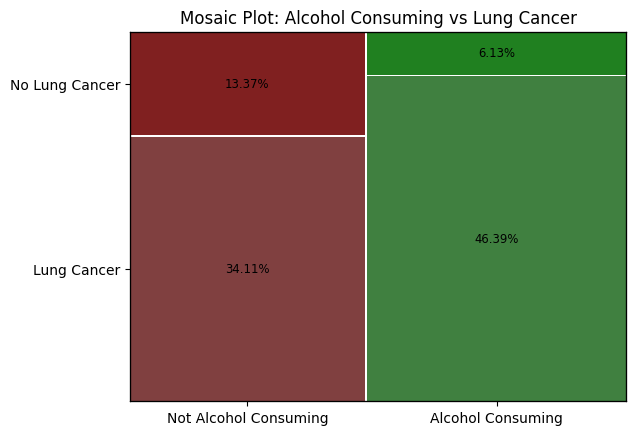

In [55]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

df_no_na.groupby('SMOKING')['LUNG_CANCER'].value_counts()
3358/953
3887/802

df_no_na.groupby('ALCOHOL CONSUMING')['LUNG_CANCER'].value_counts()
3070/1203
4175/552

mosaic_data = {
    ('Not Alcohol Consuming', 'Lung Cancer'): 3070,
    ('Not Alcohol Consuming', 'No Lung Cancer'): 1203,
    ('Alcohol Consuming', 'Lung Cancer'): 4175,
    ('Alcohol Consuming', 'No Lung Cancer'): 552
}

# Create the mosaic plot
# Function to label the rectangles with their proportion ratios
def props_label(key):
    total = sum(mosaic_data.values())
    return f'{mosaic_data[key] / total:.2%}'

# Create the mosaic plot with proportion labels
plt.figure(figsize=(8,6))
mosaic(mosaic_data, title='Mosaic Plot: Alcohol Consuming vs Lung Cancer', labelizer=props_label)
plt.show()

In [49]:
symptoms = df_no_na.columns.drop(["LUNG_CANCER","AGE"])
ratios = {}
for symptom in symptoms:
    grouped = df_no_na.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    grouped['Ratio'] = grouped[1] / grouped[0]
    ratios[symptom] = grouped

# Display the results for each symptom
for symptom, result in ratios.items():
    print(f"Ratios for {symptom}:")
    print(result)
    print("\n")

Ratios for GENDER:
LUNG_CANCER   0.0   1.0     Ratio
GENDER                           
0.0           563  3610  6.412078
1.0          1192  3635  3.049497


Ratios for SMOKING:
LUNG_CANCER  0.0   1.0     Ratio
SMOKING                         
0.0          953  3358  3.523610
1.0          802  3887  4.846633


Ratios for YELLOW_FINGERS:
LUNG_CANCER      0.0   1.0     Ratio
YELLOW_FINGERS                      
0.0             1216  3032  2.493421
1.0              539  4213  7.816327


Ratios for ANXIETY:
LUNG_CANCER   0.0   1.0     Ratio
ANXIETY                          
0.0          1017  3876  3.811209
1.0           738  3369  4.565041


Ratios for PEER_PRESSURE:
LUNG_CANCER    0.0   1.0     Ratio
PEER_PRESSURE                     
0.0            962  3442  3.577963
1.0            793  3803  4.795712


Ratios for CHRONIC DISEASE:
LUNG_CANCER      0.0   1.0     Ratio
CHRONIC DISEASE                     
0.0              900  3909  4.343333
1.0              855  3336  3.901754


Ratios f

In [65]:
# Initialize an empty dictionary to store the contingency tables
contingency_tables = {}

# Loop through each symptom to create and store the contingency tables
for symptom in symptoms:
    # Group by the symptom and 'LUNG_CANCER', and unstack to get the counts
    grouped = df_no_na.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    
    # Store the contingency table (without the ratio) in the dictionary
    contingency_tables[symptom] = grouped


{'GENDER': LUNG_CANCER   0.0   1.0
 GENDER                 
 0.0           563  3610
 1.0          1192  3635,
 'SMOKING': LUNG_CANCER  0.0   1.0
 SMOKING               
 0.0          953  3358
 1.0          802  3887,
 'YELLOW_FINGERS': LUNG_CANCER      0.0   1.0
 YELLOW_FINGERS            
 0.0             1216  3032
 1.0              539  4213,
 'ANXIETY': LUNG_CANCER   0.0   1.0
 ANXIETY                
 0.0          1017  3876
 1.0           738  3369,
 'PEER_PRESSURE': LUNG_CANCER    0.0   1.0
 PEER_PRESSURE           
 0.0            962  3442
 1.0            793  3803,
 'CHRONIC DISEASE': LUNG_CANCER      0.0   1.0
 CHRONIC DISEASE           
 0.0              900  3909
 1.0              855  3336,
 'FATIGUE ': LUNG_CANCER   0.0   1.0
 FATIGUE                
 0.0           689  2122
 1.0          1066  5123,
 'ALLERGY ': LUNG_CANCER  0.0   1.0
 ALLERGY               
 0.0          982  3084
 1.0          773  4161,
 'WHEEZING': LUNG_CANCER   0.0   1.0
 WHEEZING               


In [57]:
import numpy as np
from scipy.stats import chi2_contingency

# Contingency table for SMOKING_SWALLOWING DIFFICULTY and LUNG CANCER
contingency_table = np.array([[1555, 5822], [200, 1423]])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-square Statistic: 64.41950273098058
P-value: 1.0055785066986989e-15
Degrees of Freedom: 1
Expected Frequencies:
[[1438.515 5938.485]
 [ 316.485 1306.515]]


In [69]:
import numpy as np
from scipy.stats import chi2_contingency
import math

def statistical_test(CT):
    CT = np.array(CT, dtype=float)
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(CT)
    # Calculate Cramér's V
    n = CT.sum()  # Total sample size
    min_dim = min(CT.shape) - 1  # Min of (rows-1, columns-1)
    cramers_v = math.sqrt(chi2 / (n * min_dim))

    # Output the results
    print(f"Chi-square Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Cramér's V: {cramers_v}")

# Iterate over each key (symptom) in the contingency_tables dictionary and apply the statistical_test function
for symptom, CT in contingency_tables.items():
    print(f"Statistical Test Results for {symptom}:")
    statistical_test(CT)
    print("\n")

Statistical Test Results for GENDER:
Chi-square Statistic: 178.23067080379178
P-value: 1.1796332158599647e-40
Cramér's V: 0.14072458160210666


Statistical Test Results for SMOKING:
Chi-square Statistic: 35.486614313752355
P-value: 2.5680932175591007e-09
Cramér's V: 0.06279297051400326


Statistical Test Results for YELLOW_FINGERS:
Chi-square Statistic: 425.6838453903056
P-value: 1.413544966243217e-94
Cramér's V: 0.21748150506047012


Statistical Test Results for ANXIETY:
Chi-square Statistic: 11.096702745219535
P-value: 0.0008648134266134644
Cramér's V: 0.03511362942919828


Statistical Test Results for PEER_PRESSURE:
Chi-square Statistic: 29.88785233349947
P-value: 4.5777192705883074e-08
Cramér's V: 0.05762701173494893


Statistical Test Results for CHRONIC DISEASE:
Chi-square Statistic: 3.9482870124151077
P-value: 0.04691910613417196
Cramér's V: 0.020945132058189844


Statistical Test Results for FATIGUE :
Chi-square Statistic: 64.9211892024683
P-value: 7.795429924865162e-16
Cramér'

In [9]:
print("male")
symptoms = df_no_na.columns.drop(["LUNG_CANCER"])
# male
df_male= df_no_na[df_no_na["GENDER"]==1]

ratios = {}
for symptom in symptoms:
    grouped = df_male.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    grouped['Ratio'] = (grouped[1] / (grouped[0] + grouped[1]) * 100).round(2).astype(str) + '%'
    ratios[symptom] = grouped

# Display the results for each symptom
for symptom, result in ratios.items():
    print(f"Ratios for {symptom}:")
    print(result)
    print("\n")




male
Ratios for GENDER:
LUNG_CANCER   0.0   1.0   Ratio
GENDER                         
1.0          1192  3635  75.31%


Ratios for SMOKING:
LUNG_CANCER  0.0   1.0   Ratio
SMOKING                       
0.0          653  1684  72.06%
1.0          539  1951  78.35%


Ratios for YELLOW_FINGERS:
LUNG_CANCER     0.0   1.0   Ratio
YELLOW_FINGERS                   
0.0             886  1464   62.3%
1.0             306  2171  87.65%


Ratios for ANXIETY:
LUNG_CANCER  0.0   1.0   Ratio
ANXIETY                       
0.0          712  2001  73.76%
1.0          480  1634  77.29%


Ratios for PEER_PRESSURE:
LUNG_CANCER    0.0   1.0   Ratio
PEER_PRESSURE                   
0.0            686  1843  72.87%
1.0            506  1792  77.98%


Ratios for CHRONIC DISEASE:
LUNG_CANCER      0.0   1.0   Ratio
CHRONIC DISEASE                   
0.0              610  1979  76.44%
1.0              582  1656  73.99%


Ratios for FATIGUE :
LUNG_CANCER  0.0   1.0   Ratio
FATIGUE                       
0.0     

In [7]:
print("female_______________________")
# female
df_female= df_no_na[df_no_na["GENDER"]==0]

ratios = {}
for symptom in symptoms:
    grouped = df_female.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    grouped['Ratio'] = (grouped[1] / (grouped[0] + grouped[1]) * 100).round(2).astype(str) + '%'
    ratios[symptom] = grouped

# Display the results for each symptom
for symptom, result in ratios.items():
    print(f"Ratios for {symptom}:")
    print(result)
    print("\n")

female_______________________
Ratios for GENDER:
LUNG_CANCER  0.0   1.0   Ratio
GENDER                        
0.0          563  3610  86.51%


Ratios for SMOKING:
LUNG_CANCER  0.0   1.0   Ratio
SMOKING                       
0.0          300  1674   84.8%
1.0          263  1936  88.04%


Ratios for YELLOW_FINGERS:
LUNG_CANCER     0.0   1.0   Ratio
YELLOW_FINGERS                   
0.0             330  1568  82.61%
1.0             233  2042  89.76%


Ratios for ANXIETY:
LUNG_CANCER  0.0   1.0   Ratio
ANXIETY                       
0.0          305  1875  86.01%
1.0          258  1735  87.05%


Ratios for PEER_PRESSURE:
LUNG_CANCER    0.0   1.0   Ratio
PEER_PRESSURE                   
0.0            276  1599  85.28%
1.0            287  2011  87.51%


Ratios for CHRONIC DISEASE:
LUNG_CANCER      0.0   1.0   Ratio
CHRONIC DISEASE                   
0.0              290  1930  86.94%
1.0              273  1680  86.02%


Ratios for FATIGUE :
LUNG_CANCER  0.0   1.0   Ratio
FATIGUE          

In [79]:
# For females
# Initialize an empty dictionary to store the contingency tables
contingency_tables = {}

# Loop through each symptom to create and store the contingency tables
for symptom in symptoms:
    # Group by the symptom and 'LUNG_CANCER', and unstack to get the counts
    grouped = df_female.groupby(symptom)['LUNG_CANCER'].value_counts().unstack(fill_value=0)
    
    # Store the contingency table (without the ratio) in the dictionary
    contingency_tables[symptom] = grouped

def statistical_test(CT):
    CT = np.array(CT, dtype=float)
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(CT)
    # Calculate Cramér's V
    n = CT.sum()  # Total sample size
    min_dim = min(CT.shape) - 1  # Min of (rows-1, columns-1)
    cramers_v = math.sqrt(chi2 / (n * min_dim))

    # Output the results
    print(f"Chi-square Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Cramér's V: {cramers_v}")

# Iterate over each key (symptom) in the contingency_tables dictionary and apply the statistical_test function
for symptom, CT in contingency_tables.items():
    print(f"Statistical Test Results for {symptom}:")
    statistical_test(CT)
    print("\n")

Statistical Test Results for GENDER:
Chi-square Statistic: 0.0
P-value: 1.0
Cramér's V: nan


Statistical Test Results for SMOKING:
Chi-square Statistic: 9.066835593805115
P-value: 0.002602871131842635
Cramér's V: 0.0466126375651758


Statistical Test Results for YELLOW_FINGERS:
Chi-square Statistic: 44.64947163388031
P-value: 2.3566118074872464e-11
Cramér's V: 0.10343891813653931


Statistical Test Results for ANXIETY:
Chi-square Statistic: 0.88759888332494
P-value: 0.34612881819601193
Cramér's V: 0.01458425271820315


Statistical Test Results for PEER_PRESSURE:
Chi-square Statistic: 4.213804712773761
P-value: 0.04009630652860353
Cramér's V: 0.03177700848252071


Statistical Test Results for CHRONIC DISEASE:
Chi-square Statistic: 0.6696287770086242
P-value: 0.41318106219107886
Cramér's V: 0.01266755685391489


Statistical Test Results for FATIGUE :
Chi-square Statistic: 16.403760145847368
P-value: 5.1183594238783276e-05
Cramér's V: 0.06269710858817085


Statistical Test Results for AL

/var/folders/fc/f1h6qsms6kn106201z7qmqdc0000gn/T/ipykernel_37070/70586167.py:20: RuntimeWarning: invalid value encountered in scalar divide
  cramers_v = math.sqrt(chi2 / (n * min_dim))


In [15]:
Smokers = df_no_na[df_no_na["SMOKING"]==1]
Smokers.groupby('YELLOW_FINGERS')['YELLOW_FINGERS'].value_counts()

Non_Smokers = df_no_na[df_no_na["SMOKING"]==0]
Non_Smokers.groupby('YELLOW_FINGERS')['YELLOW_FINGERS'].value_counts()

Smokers = df_no_na[df_no_na["SMOKING"]==1]
Smokers.groupby('YELLOW_FINGERS')['PEER_PRESSURE'].value_counts()

Non_Smokers = df_no_na[df_no_na["SMOKING"]==0]
Non_Smokers.groupby('YELLOW_FINGERS')['PEER_PRESSURE'].value_counts()

YELLOW_FINGERS
0.0    2209
1.0    2480
Name: count, dtype: int64

YELLOW_FINGERS
0.0    2039
1.0    2272
Name: count, dtype: int64

YELLOW_FINGERS  PEER_PRESSURE
0.0             0.0              1192
                1.0              1017
1.0             1.0              1318
                0.0              1162
Name: count, dtype: int64

YELLOW_FINGERS  PEER_PRESSURE
0.0             1.0              1028
                0.0              1011
1.0             1.0              1233
                0.0              1039
Name: count, dtype: int64

<Figure size 800x600 with 0 Axes>

Text(10, 10, 'Low Cost')

Text(10, 10, 'High Cost')

Text(10, 10, 'Low Cost')

Text(20, -10, 'Cost (Distance)')

Text(0.5, 1.0, 'Clustering and Cost Visualization')

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

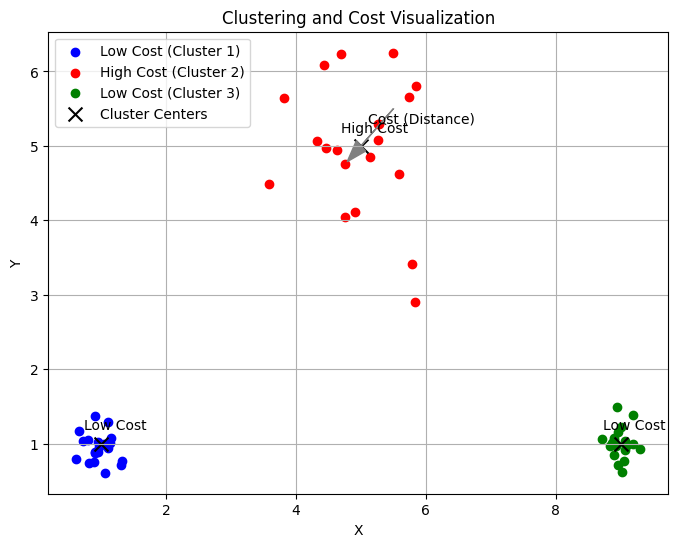

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Simulating data for 3 clusters
np.random.seed(42)

# Cluster 1: Low cost (tight grouping)
cluster_1_x = np.random.normal(1, 0.2, 20)
cluster_1_y = np.random.normal(1, 0.2, 20)

# Cluster 2: High cost (spread out)
cluster_2_x = np.random.normal(5, 0.8, 20)
cluster_2_y = np.random.normal(5, 0.8, 20)

# Cluster 3: Low cost (tight grouping)
cluster_3_x = np.random.normal(9, 0.2, 20)
cluster_3_y = np.random.normal(1, 0.2, 20)

# Plotting
plt.figure(figsize=(8, 6))

# Plot Cluster 1
plt.scatter(cluster_1_x, cluster_1_y, color='blue', label='Low Cost (Cluster 1)')
plt.annotate('Low Cost', (1, 1), textcoords="offset points", xytext=(10,10), ha='center')

# Plot Cluster 2
plt.scatter(cluster_2_x, cluster_2_y, color='red', label='High Cost (Cluster 2)')
plt.annotate('High Cost', (5, 5), textcoords="offset points", xytext=(10,10), ha='center')

# Plot Cluster 3
plt.scatter(cluster_3_x, cluster_3_y, color='green', label='Low Cost (Cluster 3)')
plt.annotate('Low Cost', (9, 1), textcoords="offset points", xytext=(10,10), ha='center')

# Adding some center points for visual aid (centers of clusters)
plt.scatter([1, 5, 9], [1, 5, 1], color='black', marker='x', s=100, label='Cluster Centers')

# Annotations for distance (Cost)
plt.arrow(5.5, 5.5, -0.5, -0.5, head_width=0.2, color='gray')
plt.annotate('Cost (Distance)', (5.5, 5.5), textcoords="offset points", xytext=(20,-10), ha='center')

# Setting the labels
plt.title('Clustering and Cost Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [21]:
df_no_na.groupby("cluster")["ALCOHOL CONSUMING"].value_counts()
df_no_na.groupby("cluster")["SMOKING"].value_counts()

cluster  ALCOHOL CONSUMING
0        1.0                  2331
         0.0                  2057
1        1.0                  2396
         0.0                  2216
Name: count, dtype: int64

cluster  SMOKING
0        1.0        2275
         0.0        2113
1        1.0        2414
         0.0        2198
Name: count, dtype: int64

LUNG_CANCER  0.0   1.0  Proportion_Cancer
SMOKING                                  
0.0          535  1578           0.746805
1.0          390  1885           0.828571


<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by Smoking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.7668054898248935, 0, '74.68%')

Text(0.8485714285714286, 1, '82.86%')

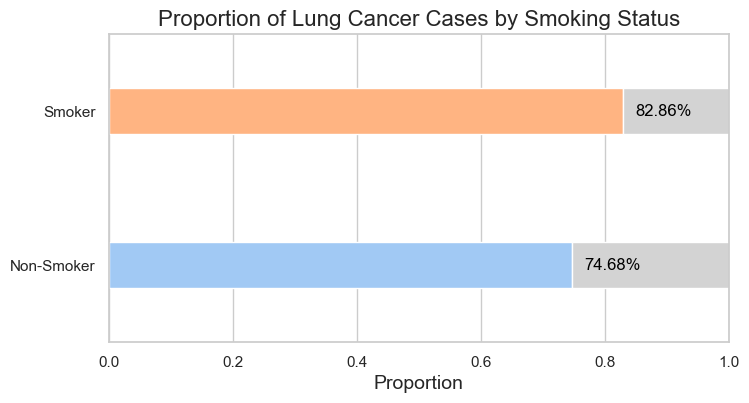

In [25]:
import seaborn as sns
#creating contingency table and getting the proportion of cancer patients for smokers and non-smokers
middle = df_no_na[df_no_na["cluster"]==0]
senior = df_no_na[df_no_na["cluster"]==1]
contingency_smoking = pd.crosstab(middle['SMOKING'], middle['LUNG_CANCER'])
contingency_smoking['Proportion_Cancer'] = contingency_smoking[1] / (contingency_smoking[0] + contingency_smoking[1])
print(contingency_smoking)

#get proportions of cancer by smoking status
proportions_smoking = contingency_smoking['Proportion_Cancer']
#get proportions of non-cancer by smoking status
non_cancer_smoking = 1 - proportions_smoking

#plot figure size 8,4
plt.figure(figsize=(8, 4))
#set theme of graph
sns.set_theme(style="whitegrid")
# y labels
y_labels_smoking = ['Non-Smoker', 'Smoker']
#change width to better fit figure
bar_width = 0.3 
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking, color='lightgrey', left=proportions_smoking, height=bar_width)

plt.title('Proportion of Lung Cancer Cases by Smoking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
# plot 0 to 1 for proportions
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking):
    plt.text(value + 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

LUNG_CANCER  0.0   1.0  Proportion_Cancer
SMOKING                                  
0.0          418  1780           0.809827
1.0          412  2002           0.829329


<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by Smoking Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.8298271155595996, 0, '80.98%')

Text(0.8493289146644574, 1, '82.93%')

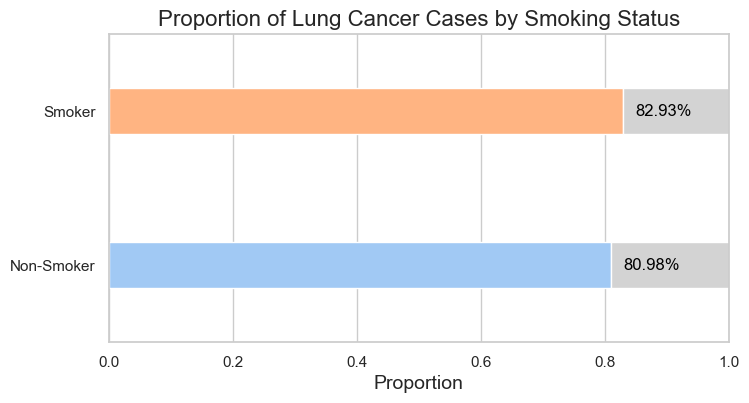

In [27]:
contingency_smoking = pd.crosstab(senior['SMOKING'], senior['LUNG_CANCER'])
contingency_smoking['Proportion_Cancer'] = contingency_smoking[1] / (contingency_smoking[0] + contingency_smoking[1])
print(contingency_smoking)

#get proportions of cancer by smoking status
proportions_smoking = contingency_smoking['Proportion_Cancer']
#get proportions of non-cancer by smoking status
non_cancer_smoking = 1 - proportions_smoking

#plot figure size 8,4
plt.figure(figsize=(8, 4))
#set theme of graph
sns.set_theme(style="whitegrid")
# y labels
y_labels_smoking = ['Non-Smoker', 'Smoker']
#change width to better fit figure
bar_width = 0.3 
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking, color='lightgrey', left=proportions_smoking, height=bar_width)

plt.title('Proportion of Lung Cancer Cases by Smoking Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
# plot 0 to 1 for proportions
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking):
    plt.text(value + 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

LUNG_CANCER        0.0   1.0  Proportion_Cancer
ALCOHOL CONSUMING                              
0.0                640  1417           0.688867
1.0                285  2046           0.877735


<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by ALCOHOL CONSUMING Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.7088672824501702, 0, '68.89%')

Text(0.8977348777348777, 1, '87.77%')

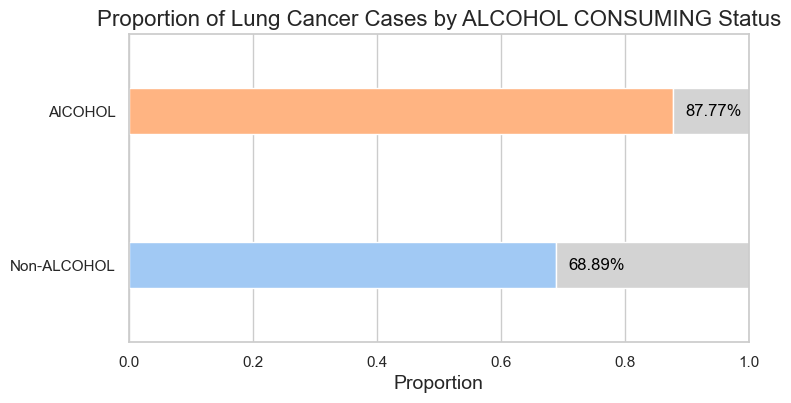

In [37]:
contingency_smoking = pd.crosstab(middle['ALCOHOL CONSUMING'], middle['LUNG_CANCER'])
contingency_smoking['Proportion_Cancer'] = contingency_smoking[1] / (contingency_smoking[0] + contingency_smoking[1])
print(contingency_smoking)

#get proportions of cancer by smoking status
proportions_smoking = contingency_smoking['Proportion_Cancer']
#get proportions of non-cancer by smoking status
non_cancer_smoking = 1 - proportions_smoking

#plot figure size 8,4
plt.figure(figsize=(8, 4))
#set theme of graph
sns.set_theme(style="whitegrid")
# y labels
y_labels_smoking = ['Non-ALCOHOL', 'AlCOHOL']
#change width to better fit figure
bar_width = 0.3 
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking, color='lightgrey', left=proportions_smoking, height=bar_width)

plt.title('Proportion of Lung Cancer Cases by ALCOHOL CONSUMING Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
# plot 0 to 1 for proportions
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking):
    plt.text(value + 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

LUNG_CANCER        0.0   1.0  Proportion_Cancer
ALCOHOL CONSUMING                              
0.0                563  1653           0.745939
1.0                267  2129           0.888564


<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by ALCOHOL CONSUMING Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.7659386281588448, 0, '74.59%')

Text(0.9085642737896494, 1, '88.86%')

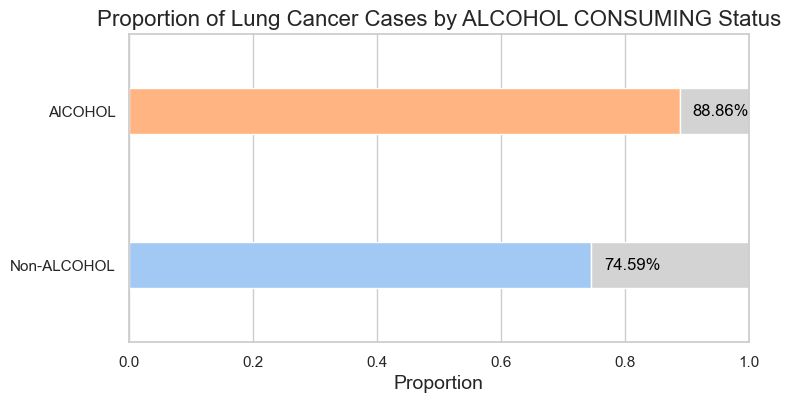

In [41]:
contingency_smoking = pd.crosstab(senior['ALCOHOL CONSUMING'], senior['LUNG_CANCER'])
contingency_smoking['Proportion_Cancer'] = contingency_smoking[1] / (contingency_smoking[0] + contingency_smoking[1])
print(contingency_smoking)

#get proportions of cancer by smoking status
proportions_smoking = contingency_smoking['Proportion_Cancer']
#get proportions of non-cancer by smoking status
non_cancer_smoking = 1 - proportions_smoking

#plot figure size 8,4
plt.figure(figsize=(8, 4))
#set theme of graph
sns.set_theme(style="whitegrid")
# y labels
y_labels_smoking = ['Non-ALCOHOL', 'AlCOHOL']
#change width to better fit figure
bar_width = 0.3 
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking, color='lightgrey', left=proportions_smoking, height=bar_width)

plt.title('Proportion of Lung Cancer Cases by ALCOHOL CONSUMING Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
# plot 0 to 1 for proportions
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking):
    plt.text(value + 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

LUNG_CANCER     0.0   1.0  Proportion_Cancer
YELLOW_FINGERS                              
0.0             654  1408           0.682832
1.0             271  2055           0.883491


<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by ALCOHOL CONSUMING Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.7028322017458778, 0, '68.28%')

Text(0.9034909716251075, 1, '88.35%')

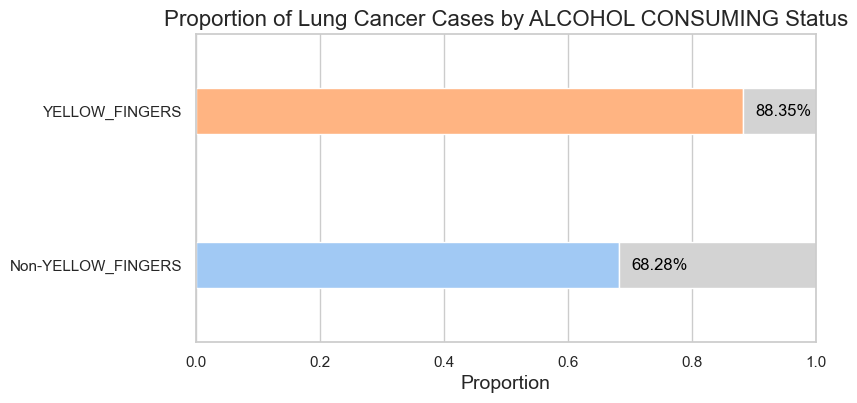

In [51]:
contingency_smoking = pd.crosstab(middle['YELLOW_FINGERS'], middle['LUNG_CANCER'])
contingency_smoking['Proportion_Cancer'] = contingency_smoking[1] / (contingency_smoking[0] + contingency_smoking[1])
print(contingency_smoking)

#get proportions of cancer by smoking status
proportions_smoking = contingency_smoking['Proportion_Cancer']
#get proportions of non-cancer by smoking status
non_cancer_smoking = 1 - proportions_smoking

#plot figure size 8,4
plt.figure(figsize=(8, 4))
#set theme of graph
sns.set_theme(style="whitegrid")
# y labels
y_labels_smoking = ['Non-YELLOW_FINGERS', 'YELLOW_FINGERS']
#change width to better fit figure
bar_width = 0.3 
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking, color='lightgrey', left=proportions_smoking, height=bar_width)

plt.title('Proportion of Lung Cancer Cases by ALCOHOL CONSUMING Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
# plot 0 to 1 for proportions
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking):
    plt.text(value + 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

LUNG_CANCER     0.0   1.0  Proportion_Cancer
YELLOW_FINGERS                              
0.0             562  1624           0.742909
1.0             268  2158           0.889530


<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Lung Cancer Cases by ALCOHOL CONSUMING Status')

Text(0.5, 0, 'Proportion')

(0.0, 1.0)

(-0.5, 1.5)

Text(0.7629094236047576, 0, '74.29%')

Text(0.909530090684254, 1, '88.95%')

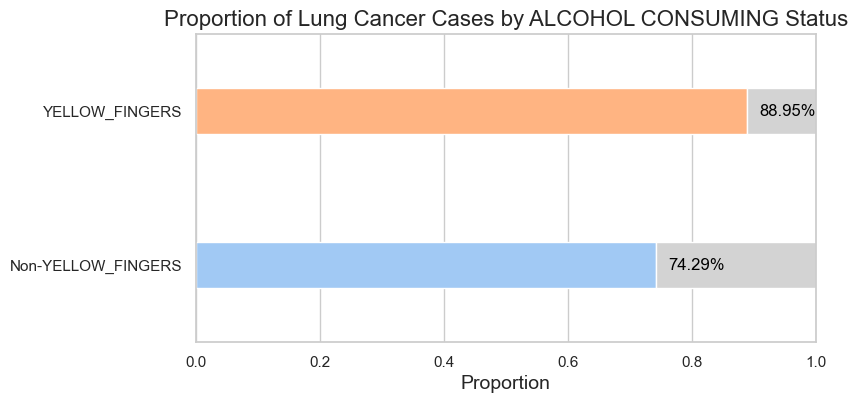

In [53]:
contingency_smoking = pd.crosstab(senior['YELLOW_FINGERS'], senior['LUNG_CANCER'])
contingency_smoking['Proportion_Cancer'] = contingency_smoking[1] / (contingency_smoking[0] + contingency_smoking[1])
print(contingency_smoking)

#get proportions of cancer by smoking status
proportions_smoking = contingency_smoking['Proportion_Cancer']
#get proportions of non-cancer by smoking status
non_cancer_smoking = 1 - proportions_smoking

#plot figure size 8,4
plt.figure(figsize=(8, 4))
#set theme of graph
sns.set_theme(style="whitegrid")
# y labels
y_labels_smoking = ['Non-YELLOW_FINGERS', 'YELLOW_FINGERS']
#change width to better fit figure
bar_width = 0.3 
#create horizontal bar chart for cancer patients who smoke/do not smoke using labels above and sns pastel color palette
bars_lung_cancer_smoking = plt.barh(y_labels_smoking, proportions_smoking, color=sns.color_palette("pastel", 2), height=bar_width)
#create horizontal bar chart for cancer patients who smoke/ do not smoke using labels above and sns pastel color palette
bars_no_cancer_smoking = plt.barh(y_labels_smoking, non_cancer_smoking, color='lightgrey', left=proportions_smoking, height=bar_width)

plt.title('Proportion of Lung Cancer Cases by ALCOHOL CONSUMING Status', fontsize=16)
plt.xlabel('Proportion', fontsize=14)
# plot 0 to 1 for proportions
plt.xlim(0, 1) 
plt.ylim(-0.5, 1.5)

#annotate % of cancer patients for smoker and non-smoker group
for index, value in enumerate(proportions_smoking):
    plt.text(value + 0.02, index, f"{value*100:.2f}%", va='center', fontsize=12, color='black') 

plt.show()

In [71]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm # This package is from sklearn where it churns out statistical reports

test = pd.read_csv('lung cancer survey.csv')
test = test.dropna()

#21 year old observation is anomalous. Thus, dropped.
test = test[test["AGE"] > 21]

test['cluster'] = test['AGE'].apply(lambda x: 1 if x >= 61 else 0)
test = test.drop("AGE", axis = 1)

x = test.drop(labels ="LUNG_CANCER", axis = 1)
y = test["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.400779
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8984
Method:                           MLE   Df Model:                           15
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                  0.1877
Time:                        19:52:38   Log-Likelihood:                -3607.0
converged:                       True   LL-Null:                       -4440.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0343      0.129     -0.266      0.791      -0.287       0.

In [75]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm # This package is from sklearn where it churns out statistical reports

test = pd.read_csv('lung cancer survey.csv')
test = test.dropna()

#21 year old observation is anomalous. Thus, dropped.
test = test[test["AGE"] > 21]

test['cluster'] = test['AGE'].apply(lambda x: 1 if x >= 61 else 0)
test = test.drop("AGE", axis = 1)
test['cluster_yellowfinger'] = test['cluster'] * test['YELLOW_FINGERS']
test['cluster_SMOKING'] = test['cluster'] * test['SMOKING']
test['cluster_ALCOHOL'] = test['cluster'] * test['ALCOHOL CONSUMING']

x = test.drop(labels ="LUNG_CANCER", axis = 1)
y = test["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.400118
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8981
Method:                           MLE   Df Model:                           18
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                  0.1890
Time:                        19:54:14   Log-Likelihood:                -3601.1
converged:                       True   LL-Null:                       -4440.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1956      0.138     -1.419      0.156      -0.466       0.

In [105]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm # This package is from sklearn where it churns out statistical reports

test = pd.read_csv('lung cancer survey.csv')
test = test.dropna()

#21 year old observation is anomalous. Thus, dropped.
test = test[test["AGE"] > 21]

test['cluster'] = test['AGE'].apply(lambda x: 1 if x >= 61 else 0)
test = test.drop("AGE", axis = 1)
test.corr()
middle = test[test['cluster']==0]
senior = test[test['cluster']==1]
middle.corr()
senior.corr()

GENDER   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.011091       -0.031982 -0.039688   
SMOKING               -0.011091  1.000000        0.001875  0.013509   
YELLOW_FINGERS        -0.031982  0.001875        1.000000  0.062337   
ANXIETY               -0.039688  0.013509        0.062337  1.000000   
PEER_PRESSURE         -0.074431 -0.026481        0.055349  0.040471   
CHRONIC DISEASE       -0.004365 -0.029657        0.008992 -0.032866   
FATIGUE               -0.049215  0.001695       -0.001341 -0.017928   
ALLERGY                0.053157  0.024306       -0.028243 -0.047311   
WHEEZING               0.036826 -0.032343       -0.043450 -0.039382   
ALCOHOL CONSUMING      0.040493 -0.019939       -0.075707 -0.001826   
COUGHING               0.027357 -0.007131        0.014883 -0.058642   
SHORTNESS OF BREATH    0.017837 -0.003838        0.016048 -0.005192   
SWALLOWING DIFFICULTY -0.009260 -0.004096        0.065091  0.078098   
CHEST PAIN             0.043874  0.010044       -0.018293 -0.053414   
LUNG_CANCER           -0.141006  0.063074        0.217762  0.035395   
cluster               -0.006049  0.004961       -0.004068  0.043911   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.074431        -0.004365 -0.049215  0.053157   
SMOKING                    -0.026481        -0.029657  0.001695  0.024306   
YELLOW_FINGERS              0.055349         0.008992 -0.001341 -0.028243   
ANXIETY                     0.040471        -0.032866 -0.017928 -0.047311   
PEER_PRESSURE               1.000000         0.009267 -0.004084 -0.055663   
CHRONIC DISEASE             0.009267         1.000000 -0.010099  0.024349   
FATIGUE                    -0.004084        -0.010099  1.000000 -0.025989   
ALLERGY                    -0.055663         0.024349 -0.025989  1.000000   
WHEEZING                   -0.054281        -0.010450 -0.027989  0.049639   
ALCOHOL CONSUMING          -0.057384        -0.028640 -0.019973  0.065076   
COUGHING                   -0.051376        -0.074833 -0.001747  0.025346   
SHORTNESS OF BREATH        -0.047932        -0.007917  0.046516 -0.007747   
SWALLOWING DIFFICULTY       0.106201         0.050285 -0.022535 -0.027669   
CHEST PAIN                 -0.021050        -0.023264 -0.015378  0.013393   
LUNG_CANCER                 0.057908        -0.021226  0.085235  0.106577   
cluster                     0.002137        -0.016780  0.058268 -0.006879   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.036826           0.040493  0.027357   
SMOKING               -0.032343          -0.019939 -0.007131   
YELLOW_FINGERS        -0.043450          -0.075707  0.014883   
ANXIETY               -0.039382          -0.001826 -0.058642   
PEER_PRESSURE         -0.054281          -0.057384 -0.051376   
CHRONIC DISEASE       -0.010450          -0.028640 -0.074833   
FATIGUE               -0.027989          -0.019973 -0.001747   
ALLERGY                0.049639           0.065076  0.025346   
WHEEZING               1.000000           0.126259  0.049138   
ALCOHOL CONSUMING      0.126259           1.000000  0.070990   
COUGHING               0.049138           0.070990  1.000000   
SHORTNESS OF BREATH    0.010180          -0.011847  0.034095   
SWALLOWING DIFFICULTY  0.027963          -0.031295 -0.083149   
CHEST PAIN             0.009885           0.024843  0.021032   
LUNG_CANCER           -0.080372           0.207659 -0.000414   
cluster                0.008480          -0.011718 -0.007702   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
GENDER                            0.017837              -0.009260    0.043874   
SMOKING                          -0.003838              -0.004096    0.010044   
YELLOW_FINGERS                    0.016048               0.065091   -0.018293   
ANXIETY                          -0.005192               0.078098   -0.053414   
PEER_PRESSURE

GENDER   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.024883       -0.048281 -0.013899   
SMOKING               -0.024883  1.000000        0.015593  0.009068   
YELLOW_FINGERS        -0.048281  0.015593        1.000000  0.064238   
ANXIETY               -0.013899  0.009068        0.064238  1.000000   
PEER_PRESSURE         -0.077883 -0.011200        0.046343  0.062341   
CHRONIC DISEASE       -0.002330 -0.024584        0.013625 -0.037726   
FATIGUE               -0.048429  0.006298        0.000851 -0.008353   
ALLERGY                0.042337  0.027339       -0.020501 -0.048540   
WHEEZING               0.010433 -0.038212       -0.067299 -0.055689   
ALCOHOL CONSUMING      0.049108 -0.000483       -0.063705  0.007882   
COUGHING               0.023391 -0.003645        0.015453 -0.055466   
SHORTNESS OF BREATH    0.008139 -0.008220        0.039965 -0.000576   
SWALLOWING DIFFICULTY -0.012852 -0.001225        0.057390  0.082231   
CHEST PAIN             0.049136 -0.003008       -0.014546 -0.035435   
LUNG_CANCER           -0.156968  0.100165        0.245533  0.040999   
cluster                     NaN       NaN             NaN       NaN   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.077883        -0.002330 -0.048429  0.042337   
SMOKING                    -0.011200        -0.024584  0.006298  0.027339   
YELLOW_FINGERS              0.046343         0.013625  0.000851 -0.020501   
ANXIETY                     0.062341        -0.037726 -0.008353 -0.048540   
PEER_PRESSURE               1.000000         0.024268  0.000270 -0.046450   
CHRONIC DISEASE             0.024268         1.000000 -0.025456  0.021884   
FATIGUE                     0.000270        -0.025456  1.000000 -0.002724   
ALLERGY                    -0.046450         0.021884 -0.002724  1.000000   
WHEEZING                   -0.056474        -0.014218 -0.047877  0.050569   
ALCOHOL CONSUMING          -0.062861        -0.036100 -0.031252  0.055935   
COUGHING                   -0.035892        -0.101408 -0.003073  0.023183   
SHORTNESS OF BREATH        -0.042808        -0.008482  0.028647 -0.028707   
SWALLOWING DIFFICULTY       0.105516         0.055963 -0.035415 -0.036773   
CHEST PAIN                 -0.045200        -0.036697 -0.031945  0.005822   
LUNG_CANCER                 0.045102        -0.033927  0.092568  0.121733   
cluster                          NaN              NaN       NaN       NaN   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.010433           0.049108  0.023391   
SMOKING               -0.038212          -0.000483 -0.003645   
YELLOW_FINGERS        -0.067299          -0.063705  0.015453   
ANXIETY               -0.055689           0.007882 -0.055466   
PEER_PRESSURE         -0.056474          -0.062861 -0.035892   
CHRONIC DISEASE       -0.014218          -0.036100 -0.101408   
FATIGUE               -0.047877          -0.031252 -0.003073   
ALLERGY                0.050569           0.055935  0.023183   
WHEEZING               1.000000           0.122350  0.052040   
ALCOHOL CONSUMING      0.122350           1.000000  0.074140   
COUGHING               0.052040           0.074140  1.000000   
SHORTNESS OF BREATH    0.016310          -0.003893  0.030890   
SWALLOWING DIFFICULTY  0.030893          -0.028579 -0.091430   
CHEST PAIN             0.020543           0.022905  0.025023   
LUNG_CANCER           -0.080890           0.231073 -0.008051   
cluster                     NaN                NaN       NaN   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
GENDER                            0.008139              -0.012852    0.049136   
SMOKING                          -0.008220              -0.001225   -0.003008   
YELLOW_FINGERS                    0.039965               0.057390   -0.014546   
ANXIETY                          -0.000576               0.082231   -0.035435   
PEER_PRESSURE

GENDER   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.002083       -0.016544 -0.063571   
SMOKING                0.002083  1.000000       -0.011137  0.017306   
YELLOW_FINGERS        -0.016544 -0.011137        1.000000  0.061011   
ANXIETY               -0.063571  0.017306        0.061011  1.000000   
PEER_PRESSURE         -0.071126 -0.041049        0.063933  0.019718   
CHRONIC DISEASE       -0.006504 -0.034342        0.004445 -0.026904   
FATIGUE               -0.049491 -0.003471       -0.003057 -0.032620   
ALLERGY                0.063352  0.021492       -0.035653 -0.045656   
WHEEZING               0.062011 -0.026843       -0.020714 -0.024795   
ALCOHOL CONSUMING      0.032182 -0.038326       -0.087211 -0.009983   
COUGHING               0.031028 -0.010365        0.014283 -0.061088   
SHORTNESS OF BREATH    0.027427  0.000219       -0.006906 -0.011208   
SWALLOWING DIFFICULTY -0.005867 -0.006811        0.072408  0.074537   
CHEST PAIN             0.039175  0.022387       -0.021698 -0.073258   
LUNG_CANCER           -0.124772  0.025355        0.190575  0.026513   
cluster                     NaN       NaN             NaN       NaN   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.071126        -0.006504 -0.049491  0.063352   
SMOKING                    -0.041049        -0.034342 -0.003471  0.021492   
YELLOW_FINGERS              0.063933         0.004445 -0.003057 -0.035653   
ANXIETY                     0.019718        -0.026904 -0.032620 -0.045656   
PEER_PRESSURE               1.000000        -0.004967 -0.008693 -0.064392   
CHRONIC DISEASE            -0.004967         1.000000  0.007171  0.026479   
FATIGUE                    -0.008693         0.007171  1.000000 -0.048465   
ALLERGY                    -0.064392         0.026479 -0.048465  1.000000   
WHEEZING                   -0.052235        -0.006583 -0.009261  0.048875   
ALCOHOL CONSUMING          -0.052139        -0.021931 -0.007453  0.073606   
COUGHING                   -0.066037        -0.049842  0.000462  0.027294   
SHORTNESS OF BREATH        -0.052981        -0.006769  0.062655  0.012729   
SWALLOWING DIFFICULTY       0.106865         0.044800 -0.009487 -0.019038   
CHEST PAIN                  0.002140        -0.009339 -0.002033  0.021095   
LUNG_CANCER                 0.070818        -0.007107  0.073225  0.092093   
cluster                          NaN              NaN       NaN       NaN   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.062011           0.032182  0.031028   
SMOKING               -0.026843          -0.038326 -0.010365   
YELLOW_FINGERS        -0.020714          -0.087211  0.014283   
ANXIETY               -0.024795          -0.009983 -0.061088   
PEER_PRESSURE         -0.052235          -0.052139 -0.066037   
CHRONIC DISEASE       -0.006583          -0.021931 -0.049842   
FATIGUE               -0.009261          -0.007453  0.000462   
ALLERGY                0.048875           0.073606  0.027294   
WHEEZING               1.000000           0.130192  0.046520   
ALCOHOL CONSUMING      0.130192           1.000000  0.067844   
COUGHING               0.046520           0.067844  1.000000   
SHORTNESS OF BREATH    0.003956          -0.019111  0.037478   
SWALLOWING DIFFICULTY  0.025213          -0.033938 -0.075322   
CHEST PAIN            -0.000873           0.027397  0.017641   
LUNG_CANCER           -0.080715           0.185492  0.007879   
cluster                     NaN                NaN       NaN   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
GENDER                            0.027427              -0.005867    0.039175   
SMOKING                           0.000219              -0.006811    0.022387   
YELLOW_FINGERS                   -0.006906               0.072408   -0.021698   
ANXIETY                          -0.011208               0.074537   -0.073258   
PEER_PRESSURE

<Axes: >

Text(0.5, 0, 'Symptoms')

Text(0, 0.5, 'Correlation with Lung Cancer')

Text(0.5, 1.0, 'Comparison of Correlation with Lung Cancer: Middle Age vs Senior')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'GENDER'),
  Text(1, 0, 'SMOKING'),
  Text(2, 0, 'YELLOW_FINGERS'),
  Text(3, 0, 'ANXIETY'),
  Text(4, 0, 'PEER_PRESSURE'),
  Text(5, 0, 'CHRONIC DISEASE'),
  Text(6, 0, 'FATIGUE '),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'WHEEZING'),
  Text(9, 0, 'ALCOHOL CONSUMING'),
  Text(10, 0, 'COUGHING'),
  Text(11, 0, 'SHORTNESS OF BREATH'),
  Text(12, 0, 'SWALLOWING DIFFICULTY'),
  Text(13, 0, 'CHEST PAIN')])

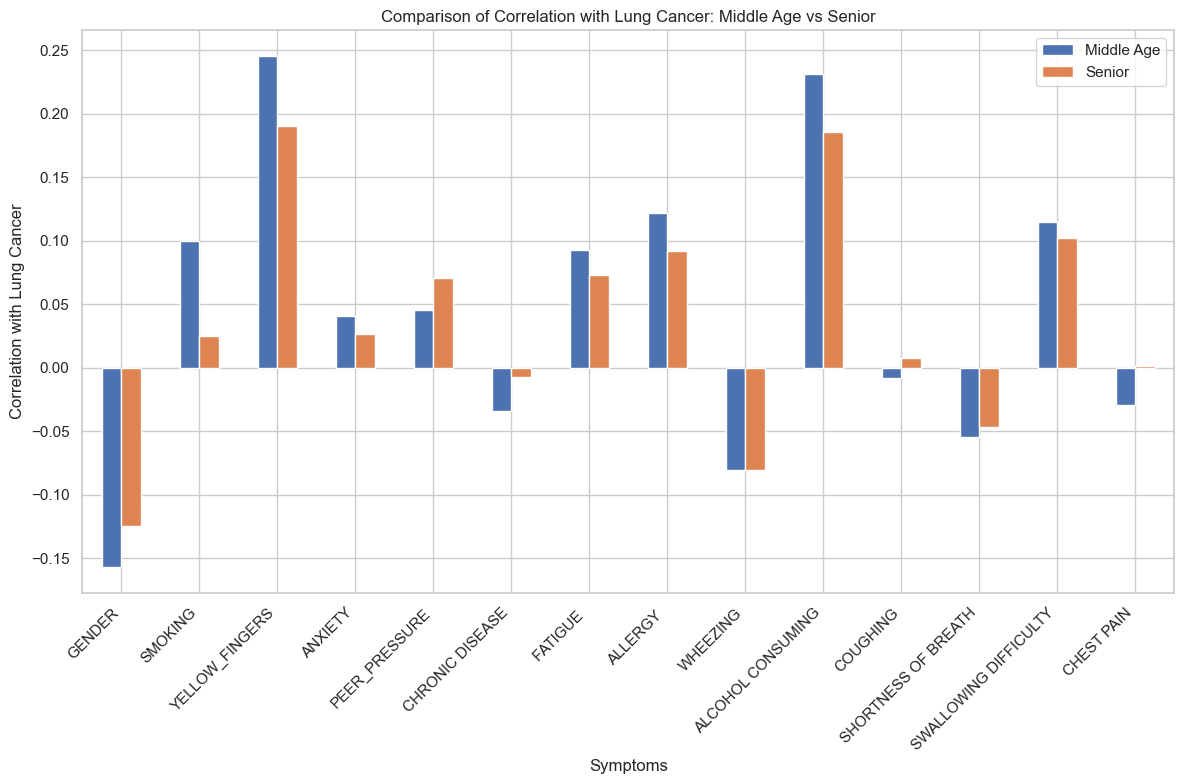

In [107]:
import matplotlib.pyplot as plt

middle = middle.drop("cluster", axis = 1)
senior = senior.drop("cluster", axis = 1)
# Calculate correlations between Lung Cancer and other variables for middle-aged and senior groups
middle_corr = middle.corr()['LUNG_CANCER'].drop('LUNG_CANCER')
senior_corr = senior.corr()['LUNG_CANCER'].drop('LUNG_CANCER')

# Create a DataFrame to store correlations
correlation_df = pd.DataFrame({
    'Middle Age': middle_corr,
    'Senior': senior_corr
})

# Plotting bar chart for each symptom
correlation_df.plot(kind='bar', figsize=(12, 8))

# Add labels and title
plt.xlabel('Symptoms')
plt.ylabel('Correlation with Lung Cancer')
plt.title('Comparison of Correlation with Lung Cancer: Middle Age vs Senior')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'test' is already loaded and cleaned as described
middle = test[test['cluster'] == 0]
senior = test[test['cluster'] == 1]

# Drop Lung Cancer from the correlation matrix (since we want to correlate it with other variables)
middle_corr = middle.corr()['LUNG_CANCER'].drop('LUNG_CANCER')
senior_corr = senior.corr()['LUNG_CANCER'].drop('LUNG_CANCER')

# Create a DataFrame to store the correlations
correlation_df = pd.DataFrame({
    'Middle Age': middle_corr,
    'Senior': senior_corr
})

# Transpose the dataframe for easier plotting
correlation_df = correlation_df.T

# Plot the stacked bar chart
ax = correlation_df.plot(kind='barh', stacked=False, figsize=(10, 6))

# Add labels and title
plt.xlabel('Correlation with Lung Cancer')
plt.ylabel('Symptoms')
plt.title('Correlation of Lung Cancer with Symptoms for Middle Age and Senior Groups')
plt.legend(title='Age Group')

# Show the plot
plt.tight_layout()
plt.show()



ValueError: could not convert string to float: 'Middle Age'

In [117]:
x = middle.drop(labels ="LUNG_CANCER", axis = 1)
y = middle["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.400636
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 4388
Model:                          Logit   Df Residuals:                     4373
Method:                           MLE   Df Model:                           14
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                  0.2221
Time:                        21:08:54   Log-Likelihood:                -1758.0
converged:                       True   LL-Null:                       -2259.9
Covariance Type:            nonrobust   LLR p-value:                2.378e-205
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0155      0.180     -0.086      0.931      -0.368       0.

In [135]:
x = senior.drop(labels ="LUNG_CANCER", axis = 1)
y = senior["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.407095
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 4612
Model:                          Logit   Df Residuals:                     4598
Method:                           MLE   Df Model:                           13
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                  0.1363
Time:                        23:00:02   Log-Likelihood:                -1877.5
converged:                       True   LL-Null:                       -2173.8
Covariance Type:            nonrobust   LLR p-value:                2.892e-118
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.2093      0.172     -1.214      0.225      -0.547       0.

In [123]:

df = pd.read_csv('lung cancer survey.csv')
df_no_na = df.dropna()

#21 year old observation is anomalous. Thus, dropped.
df_no_na = df_no_na[df_no_na["AGE"] > 21]

x = df_no_na.drop(labels ="LUNG_CANCER", axis = 1)
y = df_no_na["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.400250
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8984
Method:                           MLE   Df Model:                           15
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                  0.1888
Time:                        21:35:49   Log-Likelihood:                -3602.2
converged:                       True   LL-Null:                       -4440.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.7043      0.200     -3.513      0.000      -1.097      -0.

<Axes: >

Text(0.5, 0, 'Symptoms')

Text(0, 0.5, 'Correlation with Lung Cancer')

Text(0.5, 1.0, 'Comparison of Correlation with Lung Cancer: Female vs Male')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'AGE'),
  Text(1, 0, 'SMOKING'),
  Text(2, 0, 'YELLOW_FINGERS'),
  Text(3, 0, 'ANXIETY'),
  Text(4, 0, 'PEER_PRESSURE'),
  Text(5, 0, 'CHRONIC DISEASE'),
  Text(6, 0, 'FATIGUE '),
  Text(7, 0, 'ALLERGY '),
  Text(8, 0, 'WHEEZING'),
  Text(9, 0, 'ALCOHOL CONSUMING'),
  Text(10, 0, 'COUGHING'),
  Text(11, 0, 'SHORTNESS OF BREATH'),
  Text(12, 0, 'SWALLOWING DIFFICULTY'),
  Text(13, 0, 'CHEST PAIN'),
  Text(14, 0, 'cluster')])

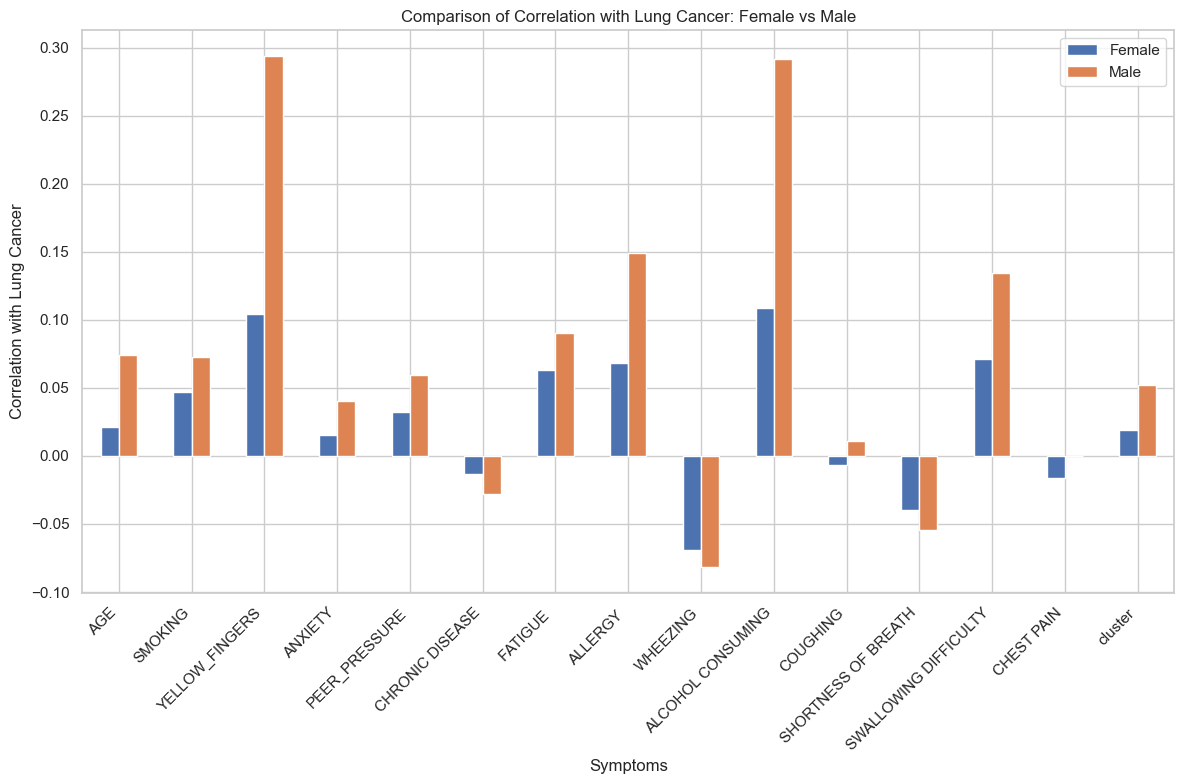

In [131]:
df = pd.read_csv('lung cancer survey.csv')
df_no_na = df.dropna()

#21 year old observation is anomalous. Thus, dropped.
df_no_na = df_no_na[df_no_na["AGE"] > 21]

df_no_na['cluster'] = df_no_na['AGE'].apply(lambda x: 1 if x >= 61 else 0)

female = df_no_na[df_no_na['GENDER']==0]
male = df_no_na[df_no_na['GENDER']==1]
female = female.drop("GENDER", axis = 1)
male = mal.drop("GENDER", axis = 1)
# Calculate correlations between Lung Cancer and other variables for middle-aged and senior groups
female_corr = female.corr()['LUNG_CANCER'].drop('LUNG_CANCER')
male_corr = male.corr()['LUNG_CANCER'].drop('LUNG_CANCER')

# Create a DataFrame to store correlations
correlation_df = pd.DataFrame({
    'Female': female_corr,
    'Male': male_corr
})

# Plotting bar chart for each symptom
correlation_df.plot(kind='bar', figsize=(12, 8))

# Add labels and title
plt.xlabel('Symptoms')
plt.ylabel('Correlation with Lung Cancer')
plt.title('Comparison of Correlation with Lung Cancer: Female vs Male')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [127]:
x = female.drop(labels ="LUNG_CANCER", axis = 1)
y = female["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.369569
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 4173
Model:                          Logit   Df Residuals:                     4157
Method:                           MLE   Df Model:                           15
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                 0.06586
Time:                        22:26:01   Log-Likelihood:                -1542.2
converged:                       True   LL-Null:                       -1650.9
Covariance Type:            nonrobust   LLR p-value:                 5.904e-38
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3981      0.476      0.836      0.403      -0.535       1.

In [133]:
x = df_no_na["GENDER"]
y = df_no_na["LUNG_CANCER"]

# Add a constant to the model (for the intercept)
X = sm.add_constant(x)

# Fit the logistic regression model using statsmodels 
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.483223
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8998
Method:                           MLE   Df Model:                            1
Date:                Thu, 10 Oct 2024   Pseudo R-squ.:                 0.02061
Time:                        22:41:26   Log-Likelihood:                -4349.0
converged:                       True   LL-Null:                       -4440.5
Covariance Type:            nonrobust   LLR p-value:                 1.046e-41
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8582      0.045     41.008      0.000       1.769       1.947
GENDER        -0.7432      0.

In [15]:
lung_cancer = df_no_na[df_no_na['LUNG_CANCER']==1]
lung_cancer["AGE"].describe()

count    7245.000000
mean       61.004003
std        11.360690
min        44.000000
25%        49.000000
50%        61.000000
75%        71.000000
max        81.000000
Name: AGE, dtype: float64

In [27]:
1653/(1653+563) *100 - 2129/(2129+267) *100

2046/(285+2046)

-14.26256456308046

0.8777348777348777